<a href="https://colab.research.google.com/github/nirmalpate/A-B-Testing-For-Pricing_Drivalia-/blob/main/AB_Testing_Drivalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
df = pd.read_csv('/content/fact_marketing_performance.csv', sep=';')

In [10]:
df

,performance_id,date,channel_key,campaign_key,country_code,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas,created_at
0,1,15/12/2025,2,7.0,US,4243.83,147237,3797,102,9160.69,25.788,1.12,41.61,2.16,2025-12-15 15:19:39.358573
1,2,15/12/2025,8,NaN,UK,3617.31,75007,2228,313,30004.18,29.704,1.62,11.56,8.29,2025-12-15 15:19:39.358611
2,3,15/12/2025,2,1.0,AU,306.66,67730,2501,151,10968.53,36.926,0.12,2.03,35.77,2025-12-15 15:19:39.358633
3,4,15/12/2025,4,NaN,US,4169.20,45362,1244,140,8662.36,27.424,3.35,29.78,2.08,2025-12-15 15:19:39.358686
4,5,15/12/2025,8,NaN,CA,4875.15,149510,1720,77,7677.16,11.504,2.83,63.31,1.57,2025-12-15 15:19:39.358720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,19/06/2025,7,8.0,US,814.27,81053,993,107,9638.16,12.251,0.82,7.61,11.84,2025-12-15 15:19:39.379288
999,1000,19/06/2025,4,4.0,UK,7939.78,47217,2346,199,17651.12,49.685,3.38,39.90,2.22,2025-12-15 15:19:39.379304
1000,1001,19/06/2025,6,NaN,DE,3561.03,81242,1723,226,25143.49,21.208,2.07,15.76,7.06,2025-12-15 15:19:39.379320
1001,1002,19/06/2025,7,NaN,AU,7956.36,24660,1186,111,5304.97,48.094,6.71,71.68,0.67,2025-12-15 15:19:39.379336


In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['revenue'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk P-value: {shapiro_test.pvalue:.3f}")

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test Statistic: 0.809
Shapiro-Wilk P-value: 0.000
Sample does not look Gaussian (reject H0)


### Visualizing the distribution of 'revenue' column

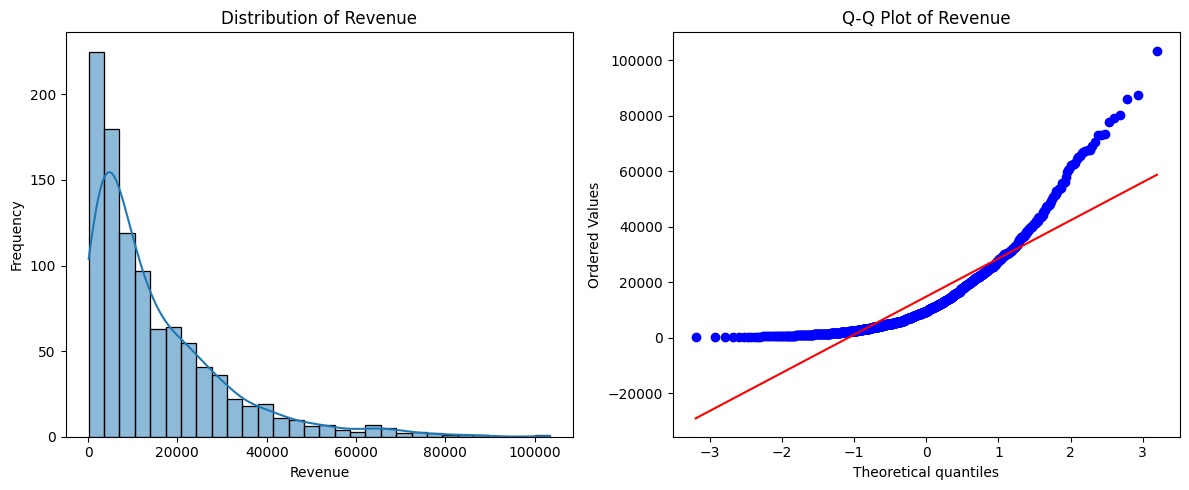

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(df['revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Revenue')

plt.tight_layout()
plt.show()

The Shapiro-Wilk test and the visual plots (histogram and Q-Q plot) will help determine if the 'revenue' column follows a normal distribution. If the p-value from the Shapiro-Wilk test is less than 0.05, we reject the null hypothesis of normality. The histogram will show the shape of the distribution, and the Q-Q plot will show how closely the data points follow a theoretical normal distribution line.

In [14]:
roas_channel_a = df[df['channel_key']==1]['roas'].mean()
roas_channel_b = df[df['channel_key']== 2]['roas'].mean()

In [ ]:
# Sample Size

In [18]:
sample_size_channel_a = len(df[df['channel_key']==1]['roas'])
sample_size_channel_b = len(df[df['channel_key']==2]['roas'])

print(f"Sample size Channel A: {sample_size_channel_a}")
print(f"Sample size Channel B: {sample_size_channel_b}")

Sample size Channel A: 144
Sample size Channel B: 120


In [21]:
t_stat, p_value = stats.ttest_ind(df[df['channel_key']==1]['roas'], df[df['channel_key']==2]['roas'], equal_var=False)

In [22]:
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: 0.0353
P-Value: 0.9719


In [23]:
alpha = 0.05

In [24]:
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ROAS between Channel A and Channel B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ROAS between Channel A and Channel B.")

Fail to reject the null hypothesis. There is no significant difference in ROAS between Channel A and Channel B.
